In [1]:
!pip install matplotlib

import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.patches as patches
# from google.colab.patches import cv2_imshow

    100% |████████████████████████████████| 13.0MB 141kB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 2.6MB/s ta 0:00:011
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
def colorShow(img):
    plt.figure(figsize = (9,6))
    plt.imshow(img, vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    
def bwShow(img):
    plt.figure(figsize = (6,4))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')

<IPython.core.display.Javascript object>


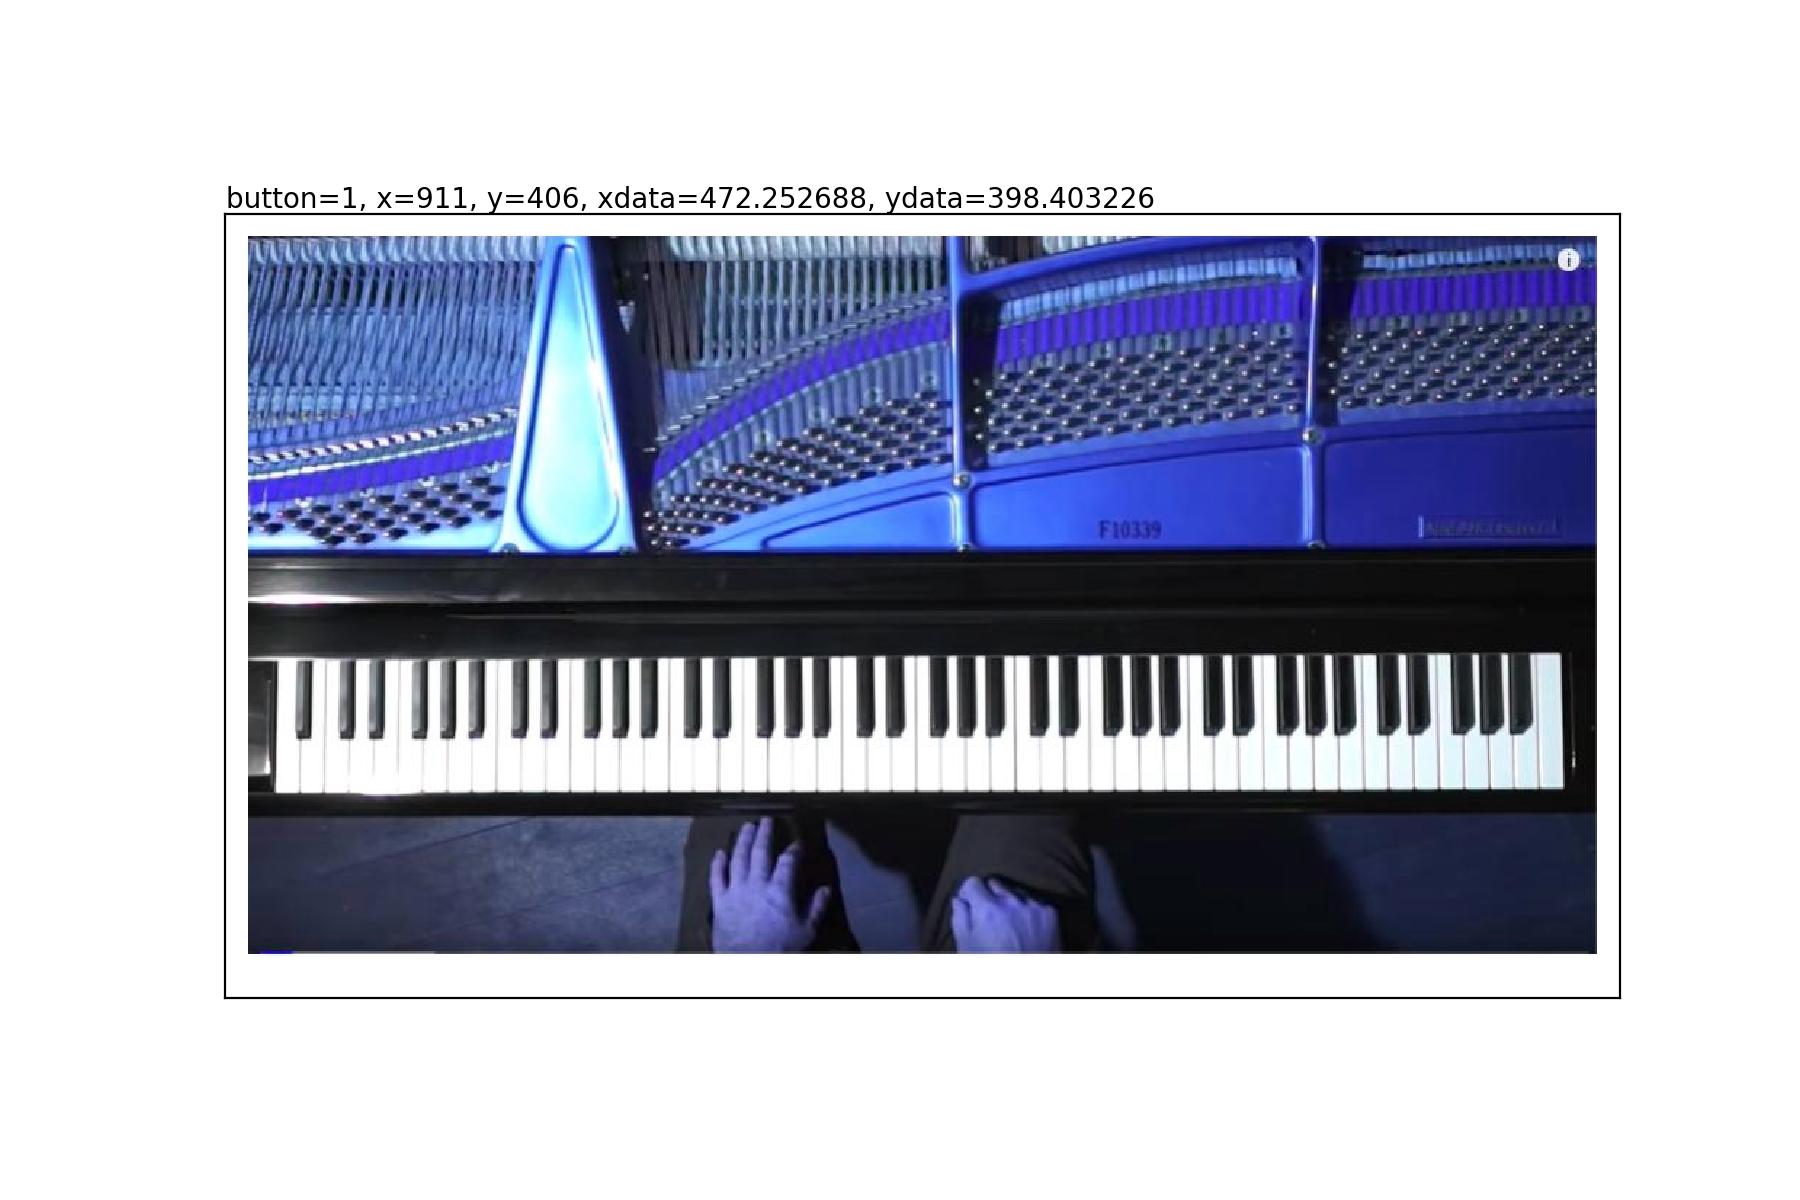

In [3]:
%matplotlib notebook
fileName = "images/examples/piano-from-above-samiksa-art.jpg"
fileName = "images/examples/blackkeybd.jpg"
# fileName = "images/examples/redkbd.jpg"
fileName = "images/examples/paul01.jpg"
img = cv.imread(fileName,-1)


fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(111)
plt.xticks([]), plt.yticks([])
ax.imshow(img)
text=ax.text(0,0, "", va="bottom", ha="left")
coords = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    coords.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [4]:
print(coords)
crop_img = img[int(coords[0][1]):int(coords[1][1]), int(coords[0][0]):int(coords[1][0])]
# bwShow(crop_img)

[[124.03763440860214, 306.1881720430107], [472.252688172043, 398.40322580645153]]


<IPython.core.display.Javascript object>


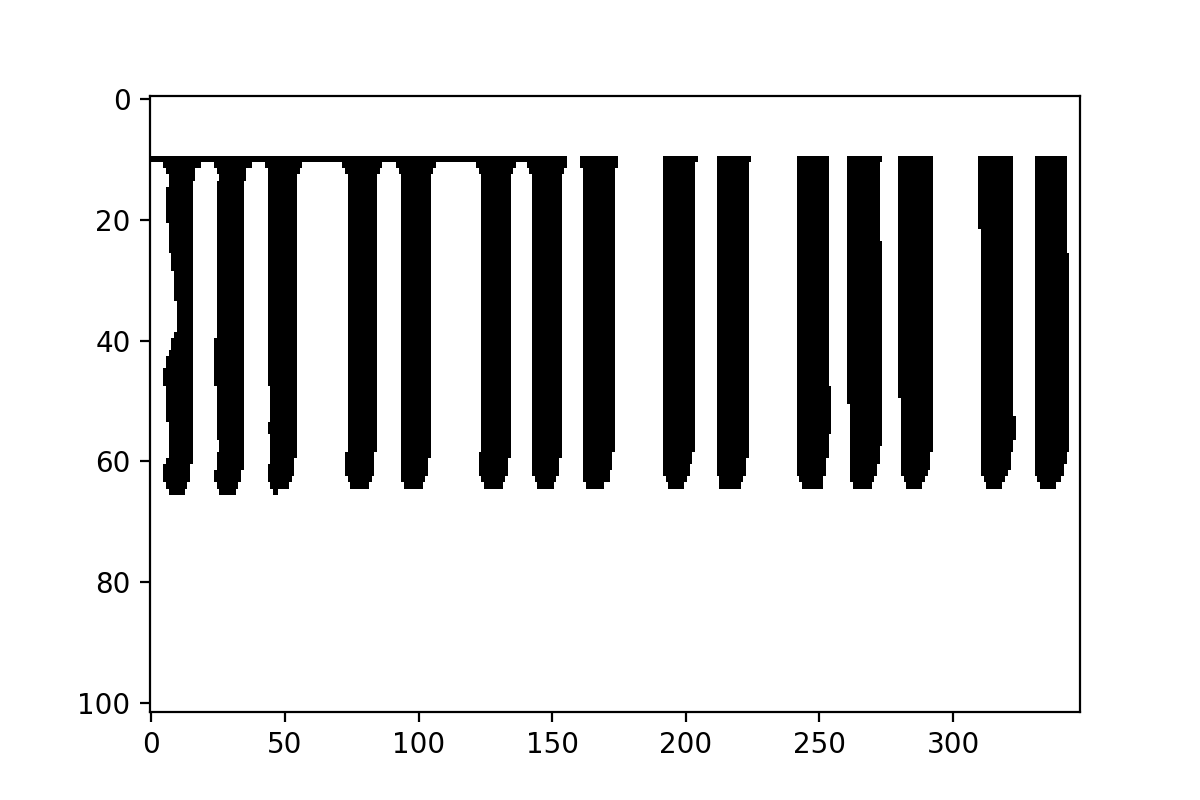

In [5]:
imgBW = cv.cvtColor(crop_img, cv.COLOR_BGR2GRAY) 
imgBW = cv.medianBlur(imgBW, 5)
thresh1 = cv.threshold(imgBW, 120, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1] 

marron = thresh1

# the number of lines added to the top to distinguish the keys
times = 10

marron = np.append(times*[[255]*thresh1.shape[1]],(thresh1))
marron = marron.reshape(thresh1.shape[0]+times,thresh1.shape[1])

marron = marron.astype(int)
marron = np.array(marron,dtype='uint8')
                   
bwShow(marron)

[[291, 8], [321, 7], [341, 6], [371, 5], [390, 4], [410, 3], [440, 2], [460, 1]]
[30, 20, 30, 19, 20, 30, 20]
19.75 30
[1, 0, 1, 0, 0, 1, 0]
10100
Bb


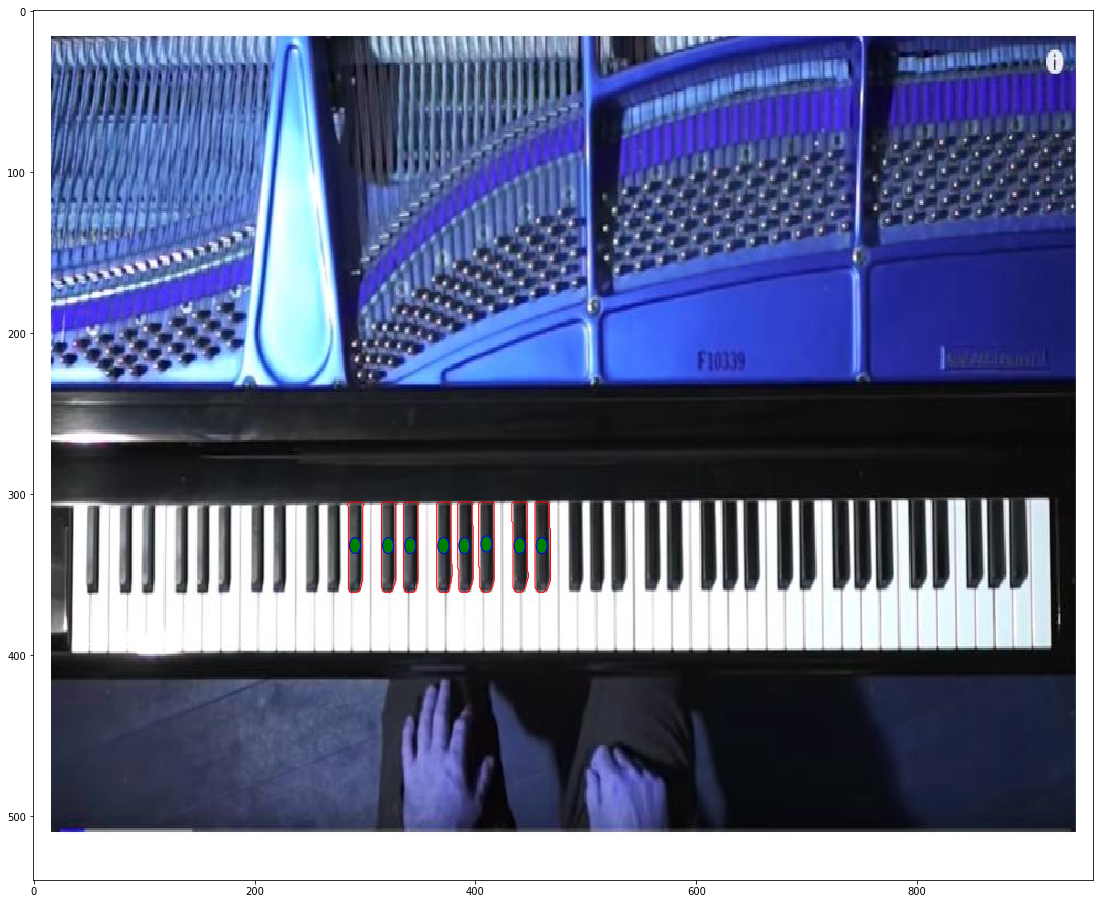

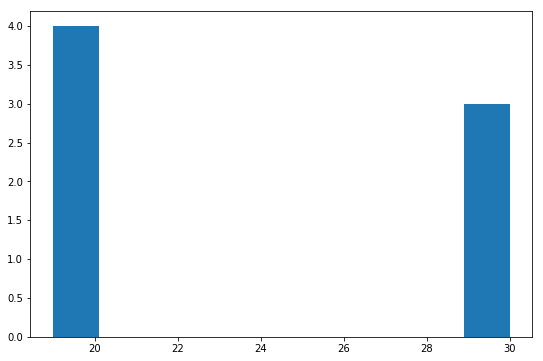

In [6]:
%matplotlib inline
import statistics
im2, contours, hierarchy = cv.findContours(marron, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# bwShow(marron)


fig,ax = plt.subplots(1)

plt.figure(figsize = (9,6))
ax.figure.set_size_inches(19,16)

ax.imshow(img,cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    #plt.figure(figsize = (9,6))
    #plt.imshow(img, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')

listOfAreas = []
for p in contours:
    listOfAreas.append(cv.contourArea(p))
medianArea = statistics.median(listOfAreas)
deltaX = int(coords[0][0]) 
deltaY = int(coords[0][1]) - times

centroidXList = []
i = 0
for p in contours:
    if cv.contourArea(p) < 10 * medianArea and cv.contourArea(p) > .1 * medianArea:
        reshapedP = p.reshape(p.shape[0],2)
        reshapedP = reshapedP + [int(coords[0][0]),deltaY]
        
        M = cv.moments(p)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroid = [cx + deltaX,cy + deltaY]
        
        centroidXList.append([ centroid[0], i ]);
        
        poly = patches.Polygon(reshapedP,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(poly)
        circ = patches.Circle(centroid,radius=5,edgecolor='b',facecolor='g')
        ax.add_patch(circ)
    i = i + 1

        
from operator import itemgetter
centroidXList = sorted(centroidXList, key=itemgetter(0))
print(centroidXList)

diffList = []
for i in range(len(centroidXList)-1):
    diffList.append(centroidXList[i + 1][0] - centroidXList[i][0])

print(diffList)
maxVal =  max(diffList)
minVal =  min(diffList)
halfVal = (maxVal + minVal) / 2

meanLow = statistics.mean([x for x in diffList if x <= halfVal])
meanHigh = statistics.mean([x for x in diffList if x > halfVal])

distList = []
for i in diffList:
    if abs(i - meanLow) < abs(i - meanHigh):
        distList.append(0)
    else:
        distList.append(1)

print(meanLow, meanHigh)
print(distList)
plt.hist(diffList)
        
distNoteMap = {'10100': "Bb", '01001': "C#", '10010': "D#", '00101': "F#",'01010': "G#"}

stDistChunck = ''.join(str(e) for e in distList[0:5])

print(stDistChunck)
if stDistChunck in distNoteMap:
    print(distNoteMap[stDistChunck])
